In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 2
Haga las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub [PRE-PROCESSING-DATA](https://github.com/BIDDL3/PRE-PROCESSING-DATA/blob/main/movies.dat) con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.

#### ! Importante

El resultado final tiene que ser un dataframe con las variables de **nombre de la película**, **año** y **género**. También es importante quedarse con un solo género para cada película!

# Solución
1. Dado que, el dataset tiene extensión **.dat**, para leerlo utilizaremos el método de pandas **.read_table**. Además, el dataset tiene como separador de columnas **::**, para solucionar esto, pasaremos como parámetro **sep='::'**

In [171]:
df_movies=pd.read_table('movies.dat', sep='::',engine='python', encoding = "ISO-8859-1")
df_movies.head(3)

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama


Se puede ver que las columnas no tienen cabeceras, para solucionar esto pasaremos el parámetro **header=None**, esto asignará a cada columna un valor númerico empezando por 0. Además se pasará el parámetro **names=['id','movie','genres']** para asignar etiquetas a las columnas.

In [172]:
df_movies=pd.read_table('movies.dat',
                        sep='::',engine='python',
                        header=None,encoding = "ISO-8859-1",
                       names=['id','movie','genres'])
df_movies.head(3)

,id,movie,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


2. En la columna 1, los registros tienen como descripción el nombre y año de cada película, vamos a crear dos columas donde se especifique el año y nombre de cada película.

In [173]:
df_movies['year_movie'] = df_movies['movie'].str.extract(r'\((\d{4})\)')
df_movies['name_movie'] = df_movies["movie"].str.split("\(",n=1, expand = True)[0]
df_movies.head()


,id,movie,genres,year_movie,name_movie
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


##### Explicación

* **str.extract(r'\((\d{4})\)')**, extrae la fecha de la columna **movie**, es decir todo lo que se encuentra de los paréntesis **()**. 

* **str.split("\(",n=1,expand = True)**, divide la columna **movies** en dos nuevas columnas, el separador es el carácter **(**. Por último, **[0]** siginifica que nos quedamos con la primera parte de la división que para lo que nos importa es la posición cero

3. Por último, después de haber hecho la separación eliminamos la columnas **id** y **movie**.3

In [174]:
df_movies.drop(['id','movie'],axis=1,inplace=True)
df_movies.head()

,genres,year_movie,name_movie
0,Animation|Children's|Comedy,1995,Toy Story
1,Adventure|Children's|Fantasy,1995,Jumanji
2,Comedy|Romance,1995,Grumpier Old Men
3,Comedy|Drama,1995,Waiting to Exhale
4,Comedy,1995,Father of the Bride Part II


4. Ordenamos los nombres de las columnas

In [175]:
new_columns=['name_movie','year_movie','genres']
df_movies=df_movies[new_columns]
df_movies.tail()

,name_movie,year_movie,genres
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama
3882,"Contender, The",2000,Drama|Thriller


In [176]:
#df_movies.describe(include='all')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_movie  3883 non-null   object
 1   year_movie  3883 non-null   object
 2   genres      3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [177]:
df_movies.isnull().sum()

name_movie    0
year_movie    0
genres        0
dtype: int64

Se puede ver que **df_movies** no tiene valores nulos. Además, en la columna **year_movies** sus vlores son una cadena, nuestro siguiente paso será convertirlos a numéricos.

In [178]:
df_movies['year_movie']=pd.to_numeric(df_movies['year_movie'],errors='coerce')

5.  Convertir los valores de la variable categórica **genres** a variables ficticias y estas tendrán un nombre único para cada género. Para este paso se utilzará el método pandas **get_dummies** que asignara el valor **1** si la película pertenece a esta variable ficticia y **0** en el caso contrario.   

In [179]:
dummies = df_movies.genres.str.get_dummies(sep='|')
df = pd.concat([df_movies, dummies], axis=1) # fusionar dataframe df_movies y variables ficticias
df.drop('genres',axis=1,inplace=True) # eliminar columna genres 
df.head()

,name_movie,year_movie,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Ejercicio 3

Muestre su creatividad. Qué cree relevante mostrar del Dataset **movies.dat** del ejercicio anterior?

Haga una o dos representaciones gráficas y justifique su elección.

# Solución

1. Nuestro próposito será trazar un gráfico de barras con la cantidad de películas por género que se ha grabado. El siguiente código muestra el intervalo de años de nuestro dataset.

In [180]:
print(df.year_movie.max())
print(df.year_movie.min())

2000
1919


2. si queremos obtener todas las películas que petenecen al género **comedy** lo haremos de la siguiente manera;

In [181]:
df['Comedy'].sum()

1200

Del código anterior se puede ver que 1200 comedias de ha grabado entre 1919 y 2020. Acontinuación haremos un  recuento por cada género  de la siguiente manera:

In [182]:
df_genres=df.iloc[:,2:20] # obtenemos todas las columnas género
df_genres.sum() # sumamos la cantidad de películas por cada género

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64

3. Gráficar nuestros datos

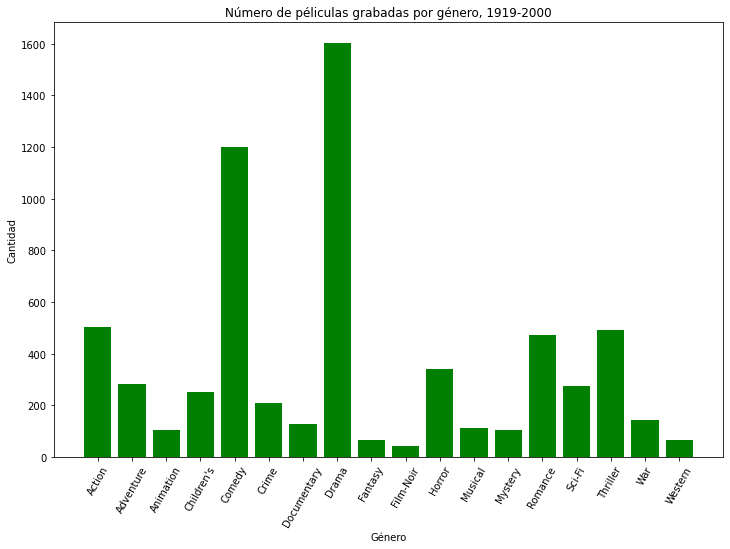

In [183]:
plt.figure(figsize=(12,8))
plt.bar(height=df_genres.sum(),x=df_genres.columns,color='green')
plt.xticks(rotation=60)
plt.title('Número de péliculas grabadas por género, 1919-2000')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

Se puede ver que el género de película que más se ha grabado de 1919 a 2000 es el **Drama**.

# Ejercicio 1
Realice la práctica del notebook en GitHub [03 EXAMINING DATA](https://github.com/BIDDL3/Examining-Data/blob/main/03%20EXAMINING%20DATA.ipynb) (haga una copia y ejecute los comandos con el mismo dataset county.txt). Este ejercicio consiste a observar las diferentes posibilidades que ofrecen las diferentes librerías de visualización gráfica.

### Ejercicio 1.1
Utilizaremos un gráfico de dispersión para examinar cómo se relacionan el gasto federal (**fed_spend**) y la pobreza (**poverty**) en el dataset **county**.

In [184]:
df=pd.read_csv('county.txt')
df.head()

,name\tstate\tpop2000\tpop2010\tfed_spend\tpoverty\thomeownership\tmultiunit\tincome\tmed_income
0,Autauga County\tAlabama\t43671\t54571\t6.06809...
1,Baldwin County\tAlabama\t140415\t182265\t6.139...
2,Barbour County\tAlabama\t29038\t27457\t8.75215...
3,Bibb County\tAlabama\t20826\t22915\t7.12201614...
4,Blount County\tAlabama\t51024\t57322\t5.130909...


* El dataset no es ligible pues tiene espacios como separador, pasaremos el arguemnto **sep='\t'** a **.read_csv()**.

In [185]:
df=pd.read_csv('county.txt', sep='\t')
df.head(3)

,name,state,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
0,Autauga County,Alabama,43671.0,54571,6.068095,10.6,77.5,7.2,24568,53255
1,Baldwin County,Alabama,140415.0,182265,6.139862,12.2,76.7,22.6,26469,50147
2,Barbour County,Alabama,29038.0,27457,8.752158,25.0,68.0,11.1,15875,33219


* Con el método **shape** obtenemos la forma del dataset, es decir, una tupla que para nuestro dataset debería de ser el siguiente:

In [17]:
print(df.shape)
print('Es decir, ',df.shape[0], 'filas y ',df.shape[1])

(3143, 10)
Es decir,  3143 filas y  10


* El método **.columns** nos devuelve una lista con los nombres de las columnas de dataset.

In [19]:
df.columns

Index(['name', 'state', 'pop2000', 'pop2010', 'fed_spend', 'poverty',
       'homeownership', 'multiunit', 'income', 'med_income'],
      dtype='object')

* El métoto **.unique()**, nos devuelve los valores únicos de una columna.

In [31]:
print('Valores únicos de la variable name:\n\n',df['name'].unique())
print('\nValores únicos de la variable state:\n\n',df['state'].unique())

Valores únicos de la variable name:

 ['Autauga County' 'Baldwin County' 'Barbour County' ... 'Uinta County'
 'Washakie County' 'Weston County']

Valores únicos de la variable state:

 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


* El métoto **DataFrmae['name'_column].nunique()**, nos devuelve la cantidad de valores únicos de una columna.

In [47]:
df.state.nunique()

51

* El métoto **.descibe()** nos devuelve las estadísticas del DataFrame, como por ejemplo, la media, el mínimo, los percentiles,... de cada columna.

In [187]:
df.describe()

,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
count,3.140000e+03,3.143000e+03,3139.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,8.962344e+04,9.823275e+04,9.990675,15.499077,73.264333,12.325231,22504.695514,44270.299077
std,2.925048e+05,3.129012e+05,7.566637,6.383861,7.831586,9.290606,5408.668247,11547.636215
min,6.700000e+01,8.200000e+01,0.000000,0.000000,0.000000,0.000000,7772.000000,19351.000000
25%,1.120975e+04,1.110450e+04,6.964390,11.000000,69.500000,6.100000,19030.000000,36952.000000
50%,2.460800e+04,2.585700e+04,8.668886,14.700000,74.600000,9.700000,21773.000000,42445.000000
75%,6.176650e+04,6.669900e+04,10.856917,19.000000,78.400000,15.900000,24813.500000,49142.000000
max,9.519338e+06,9.818605e+06,204.615692,53.500000,91.300000,98.500000,64381.000000,115574.000000


Podemos ver que los números del cuadro anterior están escritos en notación científica, para hacerlos más amigables podemos redondearlos a **n** cifras significativas de la sigueinte manera:

In [50]:
df.describe().round(2)

,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
count,3140.00,3143.00,3139.00,3143.00,3143.00,3143.00,3143.00,3143.00
mean,89623.44,98232.75,9.99,15.50,73.26,12.33,22504.70,44270.30
std,292504.85,312901.20,7.57,6.38,7.83,9.29,5408.67,11547.64
min,67.00,82.00,0.00,0.00,0.00,0.00,7772.00,19351.00
25%,11209.75,11104.50,6.96,11.00,69.50,6.10,19030.00,36952.00
50%,24608.00,25857.00,8.67,14.70,74.60,9.70,21773.00,42445.00
75%,61766.50,66699.00,10.86,19.00,78.40,15.90,24813.50,49142.00
max,9519338.00,9818605.00,204.62,53.50,91.30,98.50,64381.00,115574.00


* Los métodos **.mean()**, **.max()**, **.min()**,... sirven para obtener la media, el máximo, el mínimo,... respectivamente de una columna.

In [61]:
df['fed_spend'].mean()

9.990674566074347

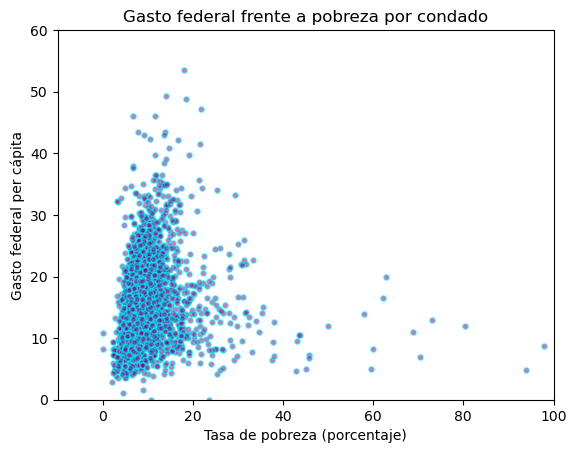

In [40]:
x, y, area = df.fed_spend, df.poverty, 5*np.pi
plt.axis([-10,100,0,60])

plt.scatter(x,y,s=area, color='purple', alpha=0.5, edgecolors='cyan')
plt.title('Gasto federal frente a pobreza por condado')
plt.ylabel('Gasto federal per cápita')
plt.xlabel('Tasa de pobreza (porcentaje)')
plt.show()

### Ejercicio 1.2
Ccompararemos el número de saltos de línea (**line_breaks**) y el número de caracteres (**num_char**) en los correos electrónicos del dataser **email50**.

In [188]:
df_email=pd.read_csv('email50.txt', sep='\t',encoding='utf-8')
df_email.head(3)

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,1,2012-01-04 05:19:16,0,0,0,no,...,0,0,21.705,551,1,1,0,0,8,small
1,0,0,1,0,0,2012-02-16 12:10:06,0,0,0,no,...,0,0,7.011,183,1,0,0,0,1,big
2,1,0,1,4,0,2012-01-04 07:36:23,0,2,0,no,...,0,0,0.631,28,0,0,0,0,2,none


In [15]:
df_email.shape

(50, 21)

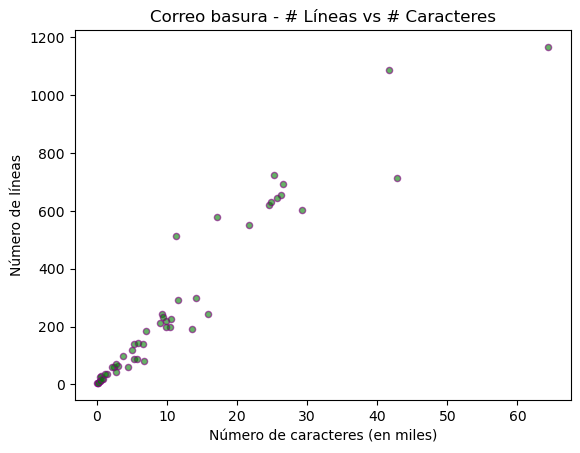

In [37]:
xx, yy, area1 = df_email.num_char, df_email.line_breaks, 20
plt.scatter(xx, yy, s=area1, color='green',edgecolors='purple',alpha=0.6)
plt.title('Correo basura - # Líneas vs # Caracteres')
plt.ylabel('Número de líneas')
plt.xlabel('Número de caracteres (en miles)')
plt.show()

Existe una relación líneal.

### Ejercicio 1.3
Consideremos un nuevo conjunto de datos **cars**. Cree un diagrama de dispersión para examinar cómo se relacionan los **precios** y **pesos**.  

¿Qué se puede decir sobre la relación entre estas variables?

In [189]:
df_cars=pd.read_csv('cars.txt', sep='\t',encoding='utf-8')
df_cars.head(3)

,type,price,mpgCity,driveTrain,passengers,weight
0,small,15.9,25,front,5,2705
1,midsize,33.9,18,front,5,3560
2,midsize,37.7,19,front,6,3405


In [26]:
df_cars.shape

(54, 6)

In [28]:
df_cars.describe()

,price,mpgCity,passengers,weight
count,54.000000,54.000000,54.000000,54.000000
mean,19.992593,23.314815,5.111111,3037.407407
std,11.506452,6.624210,0.691366,657.664350
min,7.400000,16.000000,4.000000,1695.000000
25%,10.950000,19.000000,5.000000,2452.500000
50%,17.250000,21.000000,5.000000,3197.500000
75%,26.250000,28.000000,6.000000,3522.500000
max,61.900000,46.000000,6.000000,4105.000000


In [32]:
print(df_cars.type.unique())
print(df_cars.driveTrain.unique())

['small' 'midsize' 'large']
['front' 'rear' '4WD']


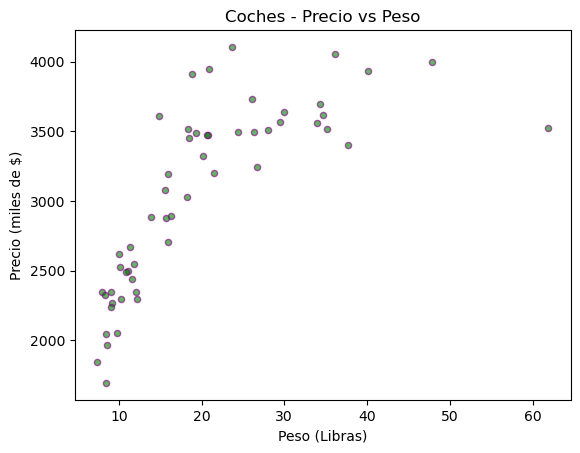

In [36]:
x_price, y_weight, area2 = df_cars.price, df_cars.weight, 20
plt.scatter(x_price, y_weight, s=area2, color='green',edgecolors='purple',alpha=0.6)
plt.title('Coches - Precio vs Peso')
plt.ylabel('Precio (miles de $)')
plt.xlabel('Peso (Libras)')
plt.show()

La relación no es líneal

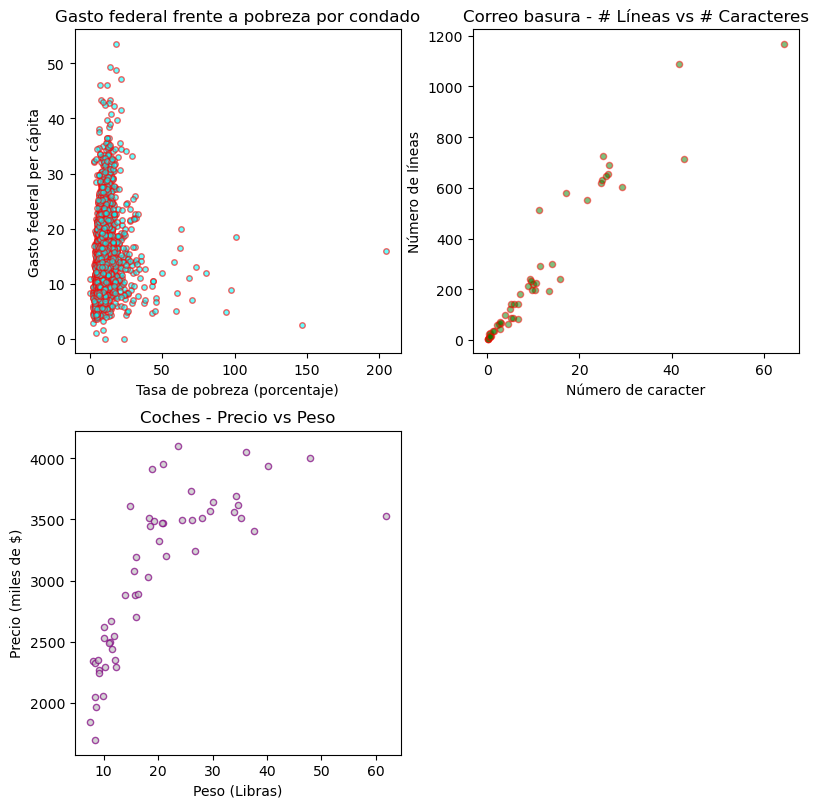

In [30]:
fig=plt.figure(figsize=(8,8))

fig1=fig.add_subplot(2,2,1)
x1, y1, s1 = df.fed_spend, df.poverty, 5*np.pi
fig1.scatter(x1,y1,s=s1,color='cyan', alpha=0.6,edgecolor='red')
plt.title('Gasto federal frente a pobreza por condado')
plt.ylabel('Gasto federal per cápita')
plt.xlabel('Tasa de pobreza (porcentaje)')

fig2=fig.add_subplot(2,2,2)
x2, y2, s2 = df_email.num_char, df_email.line_breaks, 20
fig2.scatter(x2,y2,s=s2,color='green',alpha=0.5,edgecolor='red')
plt.title('Correo basura - # Líneas vs # Caracteres')
plt.ylabel('Número de líneas')
plt.xlabel('Número de caracter')

fig3=fig.add_subplot(2,2,3)
x3, y3, s3 = df_cars.price, df_cars.weight, 20
fig3.scatter(x3,y3,s=s3,color='#c1c1c1',alpha=0.7,edgecolor='purple')
plt.title('Coches - Precio vs Peso')
plt.ylabel('Precio (miles de $)')
plt.xlabel('Peso (Libras)')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

## Gráficos de matriz

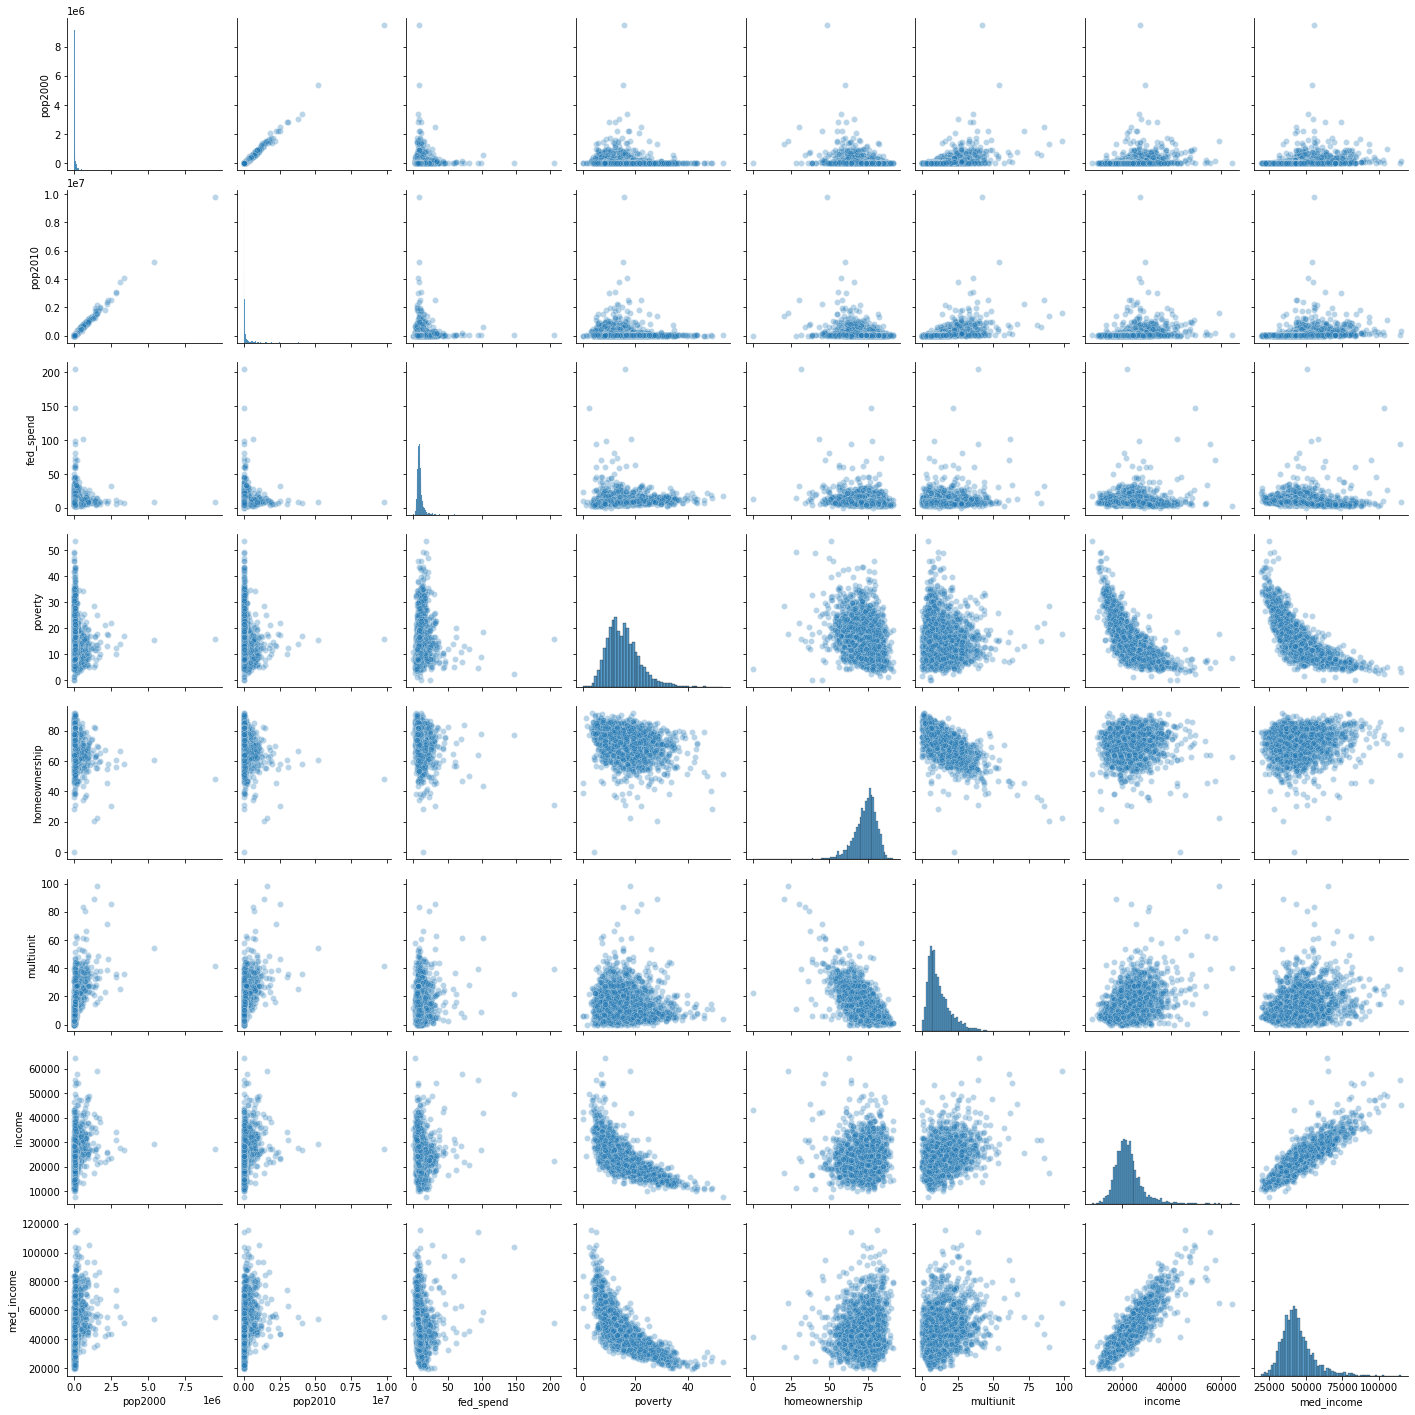

In [190]:
sns.pairplot(df,diag_kind='hist',plot_kws={'alpha':0.3});

## Histogramas
Los gráficos de puntos, como los de dispersión, muestran el valor exacto de cada observación. Esto es útil para conjuntos de datos pequeños, pero pueden resultar difíciles de leer con muestras más grandes.

En lugar de mostrar el valor de cada observación, preferimos pensar que el valor pertenece a un intervalo.

Estos intervalos (recuentos) se representan como barras en lo que se denomina histograma.

El histograma ofrece una visión de la densidad de datos. Las barras más altas representan dónde los datos son relativamente más comunes.

Los histogramas son especialmente útiles para describir la forma de la distribución de los datos.

* Cuando los datos se desvían hacia la derecha y tienen una cola derecha más larga, se dice que la forma es sesgada hacia la derecha o también llamada sesgada hacia el extremo positivo.
* Por el contrario, los datos que presentan la característica inversa, es decir, una cola larga y fina hacia la izquierda, se consideran sesgados a la izquierda. También decimos que una distribución de este tipo tiene una larga cola izquierda.
* Los datos que muestran una cola aproximadamente igual en ambas direcciones se denominan Simétricos.

In [45]:
df_email.describe().round(2)
#df_email.info()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,50.0,50.00,50.0,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.0,50.00
mean,0.1,0.14,1.0,0.38,0.32,0.0,0.10,0.90,0.0,0.0,0.46,11.60,267.30,0.74,0.28,0.06,0.0,4.42
std,0.3,0.35,0.0,1.09,0.47,0.0,0.42,3.52,0.0,0.0,1.63,13.13,290.82,0.44,0.45,0.24,0.0,7.66
min,0.0,0.00,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.06,5.00,0.00,0.00,0.00,0.0,0.00
25%,0.0,0.00,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,2.54,60.25,0.25,0.00,0.00,0.0,1.00
50%,0.0,0.00,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,6.89,162.50,1.00,0.00,0.00,0.0,1.50
75%,0.0,0.00,1.0,0.00,1.00,0.0,0.00,0.00,0.0,0.0,0.00,15.41,459.00,1.00,1.00,0.00,0.0,4.00
max,1.0,1.00,1.0,5.00,1.00,0.0,2.00,23.00,0.0,0.0,8.00,64.40,1167.00,1.00,1.00,1.00,0.0,43.00


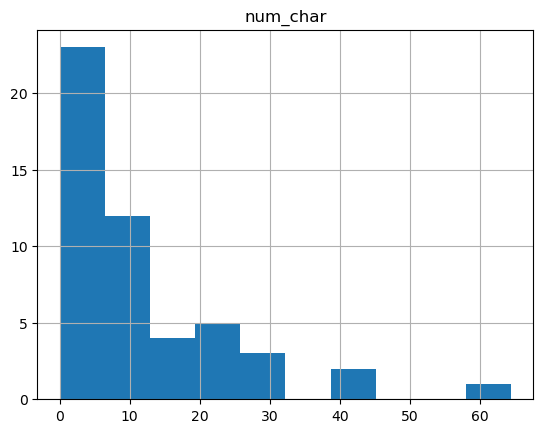

In [90]:
df_email.hist(['num_char'],bins=10)
plt.show()

**Colas largas para identificar la asimetría**

Cuando los datos se desvían en una dirección, la distribución tiene una cola larga. Si una distribución tiene una larga cola izquierda, está sesgada a la izquierda. Si una distribución tiene una larga cola derecha, está sesgada a la derecha.

## Distribución modal

Además de observar si una distribución es Asimétrica o Simétrica, los histogramas pueden utilizarse para identificar **Modos**.

Un modo es el valor con el mayor número de ocurrencias.

Sin embargo, es común no tener observaciones con el mismo valor en un conjunto de datos, lo que hace que el modo sea inútil para muchos conjuntos de datos reales.

Una moda está representada por un pico prominente en la distribución. Sólo hay un pico prominente en el histograma de **num_char**.

Los histogramas que tienen uno, dos o tres picos prominentes se denominan **Unimodal**, **Bimodal** y **Multimodal**, respectivamente.

Cualquier distribución con más de 2 picos prominentes se denomina Multimodal.

Observe que había un pico prominente en la distribución Unimodal con un segundo pico menos prominente que no se contó, ya que sólo difiere de sus intervalos vecinos en unas pocas observaciones.

![modal_distribution.jpeg](modal_distribution.jpeg)

## Resumen estadístico

### Media - Promedio
La media, a veces llamada promedio, es una forma común de medir el centro de una distribución de datos.


#### Media

La media muestral $\bar{x}$ de una variable numérica se calcula como la suma de todas las observaciones dividida por el número de observaciones:
$$
\bar{x}=\frac{x_1+x_2+\cdots+x_n}{n}
$$

donde $𝑥_1, 𝑥_2, \cdots ,𝑥_𝑛$ representan los $n$ valores observados.

Para hallar el número medio de caracteres (**num_char**) en los 50 correos electrónicos, sumamos todos los recuentos de caracteres y los dividimos por el número de correos electrónicos.


### Ejercicio 1.4

Compara las dos ecuaciones anteriores. Las siguientes cuestiones se refiene a la columna **num_char** del dataser **email50**.

* ¿A qué corresponde $𝑥_1$ corresponde?

* y $𝑥_2$?

* ¿Puede deducir un significado general de lo que $x_i$ podría representar?

* ¿Qué representaba $n$ en esta muestra de correos electrónicos?

#### Solución 1.4

In [56]:
df_email[['num_char']].head(2)

,num_char
0,21.705
1,7.011


* $x_1=21.705$ representa en miles, el número de caracteres en el primer correo.

* $x_2=7.011$ es el número de caracteres del segundo correo.

* $x_i$ es el número de caracteres del $i$_ésimo correo.
* $n$ representa el tamaño de la muestra.

### Ejercicio 1.5

El número medio de caracteres en todos los correos electrónicos puede estimarse utilizando los datos de la muestra.

Basándose en la muestra de 50 emails

* ¿cuál sería una estimación razonable de $\mu 𝑥$, el número medio de caracteres en todos los correos electrónicos del conjunto de datos? (Recuerde que email50 es una muestra de email).

#### Solución 1.5

In [95]:
round(df_email.num_char.mean(),2)

11.6

### Varianza y desviación estándar

In [66]:
df_email.num_char.mean()- df_email.num_char.std()

-1.5270410334236892

#### Varianza

La media se introdujo como método para describir el centro de un conjunto de datos, pero la variabilidad de los datos también es importante.

Introducimos dos medidas de variabilidad: la **Varianza** y la **Desviación Estándar**. Ambas son muy útiles en el análisis de datos.

La **Desviación Estándar** describe lo lejos que se encuentra la observación típica de la **media**.

Llamamos Desviación a la distancia de una observación respecto a su media.

A continuación se muestran las desviaciones de las observaciones 1ª, 2ª, 3ª y 50ª en la variable **num_char**. Por comodidad de cálculo, el número de caracteres se indica en miles y se redondea al primer decimal.

In [97]:
df_email.num_char.iloc[0:3].round(1)

0    21.7
1     7.0
2     0.6
Name: num_char, dtype: float64

In [89]:
df_email.num_char.iloc[49]

15.829

$$
\begin{align}
x_1-\bar{x}&=21.7-11.6=10.1\\
x_2-\bar{x}&=7.0-11.6=−4.6\\
x_3-\bar{x}&=0.6-11.6=−11.0\\
&\vdots\\
x_{50}-\bar{x}&=15.8-11.6=4.2\\
\end{align}
$$

Si elevamos al cuadrado estas desviaciones y luego sacamos una media, el resultado es aproximadamente igual a la varianza muestral, denotada por $𝑠^2$:

\begin{align*}s^2\:=\:\frac{10.1^2 + (−4.6)^2 + (−11.0)^2 + · · · + 4.2^2}{50 − 1} = 172,44\end{align*}

Varianza de la muestra $𝑠^2$

Al calcular la varianza dividimos por $n-1$ en lugar de $n$.


Elevar al cuadrado las desviaciones hace dos cosas:

* En primer lugar, hace que los valores grandes sean mucho mayores, como se ve al calcular $10.1^2$,  $(-4.6)^2$,  $(-11.0)^2$ y $4.2^2$.

* En segundo lugar, elimina los signos negativos.

La varianza es aproximadamente la distancia media al cuadrado de la media.

### Desviación típica


La Desviación Estándar se define como la raíz cuadrada de la Varianza :

$%$   
\begin{align*}s = \sqrt{172.44} = 13.13\end{align*}   
$%$ 

La Desviación Estándar es útil cuando se considera lo cerca que están los datos de la Media.

Las fórmulas y métodos utilizados para calcular la Varianza y la Desviación Estándar para una Población son similares a los utilizados para una muestra (La única diferencia es que la Varianza de la Población tiene una división por $n$ en lugar de $𝑛-1$ ).


Sin embargo, al igual que la Media, los valores de la Población tienen símbolos especiales :

* $\sigma^2$  para la Varianza y

* $\sigma$  para la Desviación Estándar.

El símbolo $\sigma$ es la letra Griega sigma.

In [98]:
round(df_email.num_char.std(),2)

13.13

La Desviación Estándar describe la Variabilidad, por lo que hay que centrarse en el significado conceptual de la Desviación Estándar como descriptor de la Variabilidad más que en las fórmulas.

Normalmente, el 70% de los datos estarán dentro de una desviación típica de la media y alrededor del 95% estarán dentro de dos desviaciones típicas. Sin embargo, estos porcentajes no son reglas estrictas.

### Ejercicio 1.6
Una buena descripción de la forma de una distribución debe incluir la modalidad y si la distribución es simétrica o está sesgada hacia un lado.

Explore la figura como ejemplo y explique por qué es importante una descripción de este tipo:

![modal](exercici3_6.jpeg)

#### Solución 1.6
La figura muestra tres distribuciones que parecen bastante diferentes, pero todas tienen la misma Media, Varianza y Desviación estándar.

Utilizando la Modalidad, podemos distinguir entre el primer gráfico (bimodal) y los dos últimos (unimodales).

Mediante la asimetría, podemos distinguir entre el último gráfico (sesgado a la derecha) y los dos primeros.

Mientras que una imagen, como un histograma, ofrece una información más completa, podemos utilizar la modalidad y la forma (simetría/torsión) para caracterizar la información básica sobre una distribución.

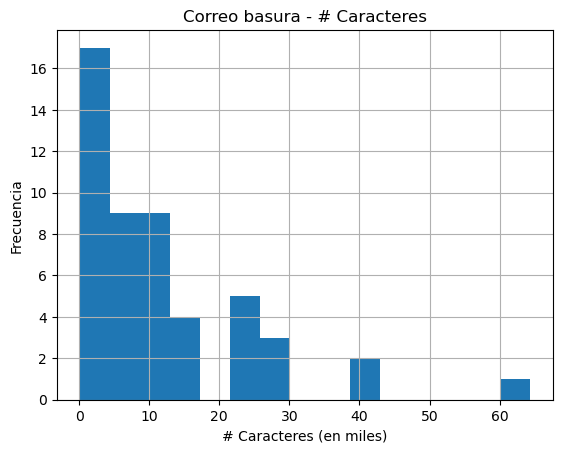

In [5]:
df_email.hist('num_char',bins=15)
plt.title('Correo basura - # Caracteres')
plt.ylabel('Frecuencia')
plt.xlabel('# Caracteres (en miles)')
plt.show()

### Ejercicio 1.6
Describa la distribución de la variable **num_char** utilizando la visualización del histograma anterior.

La descripción debe incorporar el centro, la variabilidad y la forma de la distribución, así como situarla en su contexto: el número de caracteres de los mensajes de correo electrónico. Señale también los casos especialmente inusuales.

#### Solución 1.7
La distribución de los números de caracteres de correo electrónico es **unimodal** y muy sesgada hacia el extremo superior. Muchos de los resultados se aproximan a la media (11.6) y la mayoría se sitúan a menos de una desviación típica (13.13) de la media. Hay un mensaje excepcionalmente largo, de unos 65.000 caracteres.

In [9]:
round(df_email.num_char.std(),2)

13.13

Utilizaremos la Varianza y la Desviación estándar para evaluar lo cerca que está la Media muestral ($\bar{x}$) de la media de la población ($\mu$).

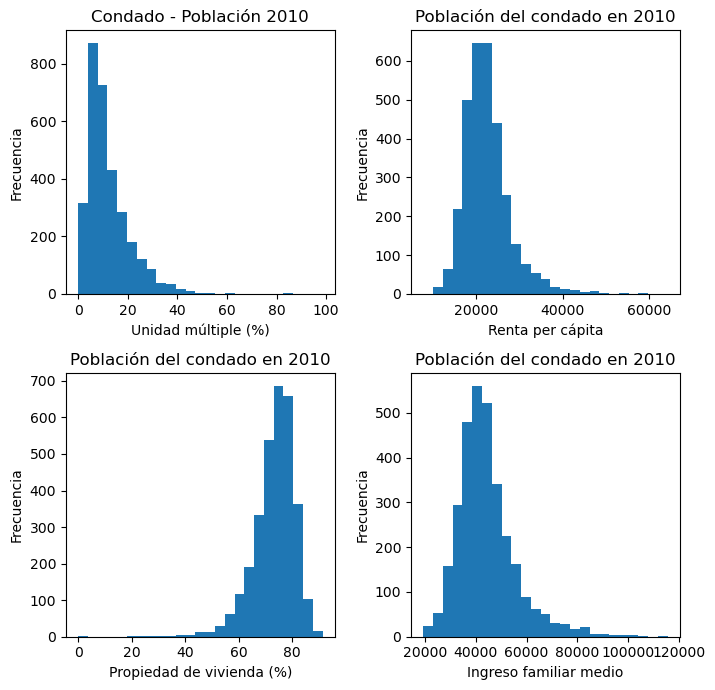

In [20]:
fig=plt.figure(figsize=(7,7))

fig1=fig.add_subplot(2,2,1)
fig1.hist(df['multiunit'],bins=25)
plt.title('Condado - Población 2010')
plt.ylabel('Frecuencia')
plt.xlabel('Unidad múltiple (%)')

fig2=fig.add_subplot(2,2,2)
fig2.hist(df['income'], bins=25)
plt.title('Población del condado en 2010')
plt.ylabel('Frecuencia')
plt.xlabel('Renta per cápita')

fig3=fig.add_subplot(2,2,3)
fig3.hist(df['homeownership'], bins=25)
plt.title('Población del condado en 2010')
plt.ylabel('Frecuencia')
plt.xlabel('Propiedad de vivienda (%)')

fig4=fig.add_subplot(2,2,4)
fig4.hist(df['med_income'], bins=25)
plt.title('Población del condado en 2010')
plt.ylabel('Frecuencia')
plt.xlabel('Ingreso familiar medio')
plt.tight_layout()
plt.show()

In [23]:
df.describe().round(2)

,pop2000,pop2010,fed_spend,poverty,homeownership,multiunit,income,med_income
count,3140.00,3143.00,3139.00,3143.00,3143.00,3143.00,3143.00,3143.00
mean,89623.44,98232.75,9.99,15.50,73.26,12.33,22504.70,44270.30
std,292504.85,312901.20,7.57,6.38,7.83,9.29,5408.67,11547.64
min,67.00,82.00,0.00,0.00,0.00,0.00,7772.00,19351.00
25%,11209.75,11104.50,6.96,11.00,69.50,6.10,19030.00,36952.00
50%,24608.00,25857.00,8.67,14.70,74.60,9.70,21773.00,42445.00
75%,61766.50,66699.00,10.86,19.00,78.40,15.90,24813.50,49142.00
max,9519338.00,9818605.00,204.62,53.50,91.30,98.50,64381.00,115574.00


### GRÁFICOS DE CAJA

Un diagrama de cajas resume un conjunto de datos utilizando cinco estadísticos, a la vez que traza observaciones inusuales (anomalías o valores atípicos).

#### Cuartiles y mediana

In [25]:
df_email.shape

(50, 21)

In [30]:
df_email.describe().round(2)

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,inherit,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess
count,50.0,50.00,50.0,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.0,50.00
mean,0.1,0.14,1.0,0.38,0.32,0.0,0.10,0.90,0.0,0.0,0.46,11.60,267.30,0.74,0.28,0.06,0.0,4.42
std,0.3,0.35,0.0,1.09,0.47,0.0,0.42,3.52,0.0,0.0,1.63,13.13,290.82,0.44,0.45,0.24,0.0,7.66
min,0.0,0.00,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.06,5.00,0.00,0.00,0.00,0.0,0.00
25%,0.0,0.00,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,2.54,60.25,0.25,0.00,0.00,0.0,1.00
50%,0.0,0.00,1.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,6.89,162.50,1.00,0.00,0.00,0.0,1.50
75%,0.0,0.00,1.0,0.00,1.00,0.0,0.00,0.00,0.0,0.0,0.00,15.41,459.00,1.00,1.00,0.00,0.0,4.00
max,1.0,1.00,1.0,5.00,1.00,0.0,2.00,23.00,0.0,0.0,8.00,64.40,1167.00,1.00,1.00,1.00,0.0,43.00


La mediana (6.89) divide los datos en el 50% inferior y el 50% superior, marcados en el gráfico de puntos con guiones horizontales y círculos abiertos, respectivamente.

In [36]:
round(df_email.num_char.median(),2)

6.89

El primer paso en la construcción de un diagrama de cajas es trazar una línea oscura que denote la mediana, que divide los datos por la mitad. El 50% de los datos caen por debajo de la mediana y el otro 50% caen por encima de la mediana.

Hay 50 caracteres en el conjunto de datos (un número par), por lo que los datos se dividen perfectamente en dos grupos de 25 caracteres. . En este caso, tomamos la mediana como la media de las dos observaciones más próximas al percentil 50:


\begin{align}
(6,768+7,012)/2=6,890.
\end{align}


Cuando hay un número impar de observaciones, habrá exactamente una observación que divida los datos en dos mitades, y en tal caso esa observación es la mediana (no se necesita la media).

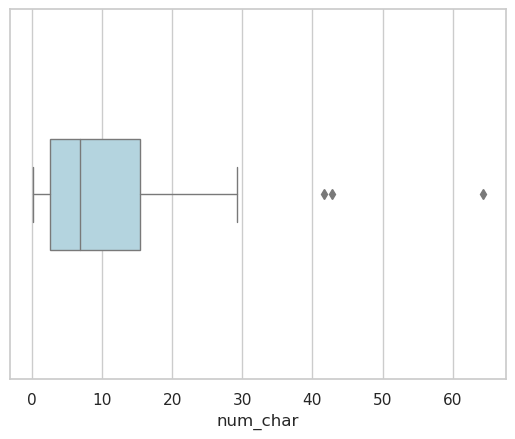

In [57]:
sns.set(style="whitegrid")
sns.boxplot(x=df_email['num_char'] ,color='lightblue', fliersize=5,  linewidth=1 , width=0.3)
plt.show()

#### Mediana

Si los datos están ordenados de menor a mayor, la mediana es la observación que se encuentra justo en el medio.

Si hay un número par de observaciones, habrá dos valores en el medio, y la mediana se toma como su media.

El segundo paso en la construcción de un diagrama de caja es dibujar un rectángulo que represente el 50 medio de los datos. La longitud total de la caja se denomina rango intercuartílico (IQR). Al igual que la desviación estándar, es una medida de la variabilidad de los datos. Cuanto más variables sean los datos, mayores serán la desviación típica y el IQR.

Los dos límites de la caja se denominan primer cuartil (el percentil 25), es decir, el 25 de los datos caen por debajo de este valor y el tercer cuartil (el percentil 75), y suelen etiquetarse como 𝑄1 y 𝑄3 , respectivamente.

##### Rango intercuartílico (IQR)

El IQR es la longitud de la caja en un gráfico de cajas. Se calcula como
\begin{align}
𝐼𝑄𝑅=𝑄3-𝑄1
\end{align}
donde $Q1$ y $Q3$ son los percentiles 25 y 75.

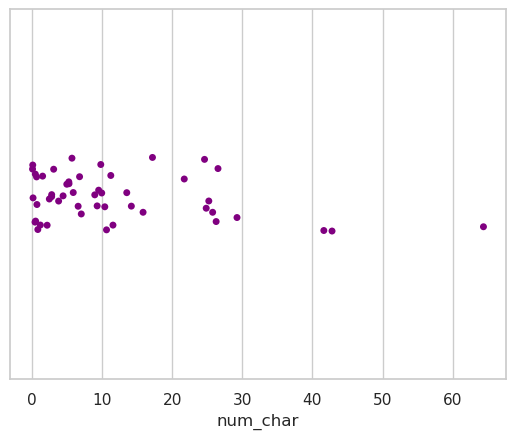

In [52]:
sns.stripplot(x=df_email.num_char,color='purple')
plt.show()

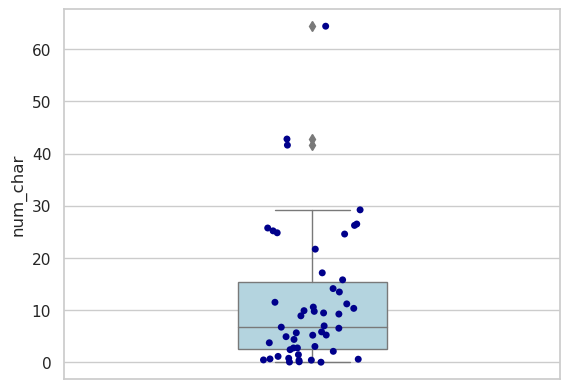

In [58]:
ax = sns.boxplot(y="num_char", data=df_email,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=df_email["num_char"], orient='v', color='darkblue')

In [61]:
df_email.num_char.head(5)

0    21.705
1     7.011
2     0.631
3     2.454
4    41.623
Name: num_char, dtype: float64

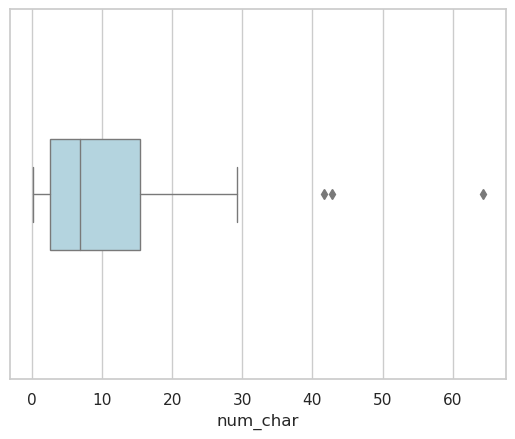

In [69]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_email["num_char"], color='lightblue', fliersize=5,  linewidth=1 , width=0.3,data=df_email)

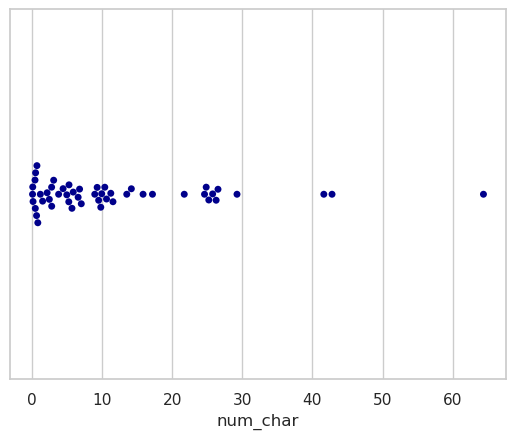

In [72]:
sns.swarmplot(x=df_email["num_char"], color='darkblue')
plt.show()

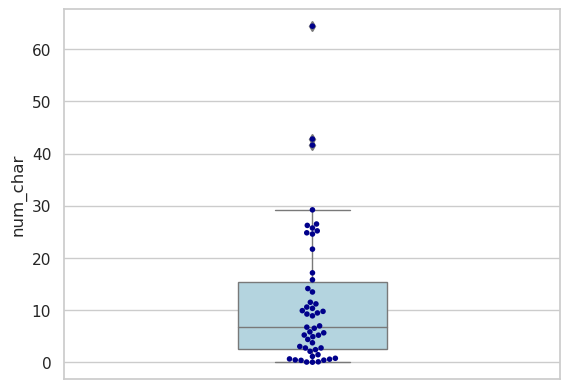

In [73]:
ax = sns.boxplot(y="num_char", data=df_email,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.swarmplot(y="num_char", data=df_email, color="darkblue", orient="v", size=4)

### Ejercicio 1.8

1. ¿Qué porcentaje de los datos se encuentra entre Q1 y la mediana?
2. ¿Qué porcentaje está entre la mediana y Q3?

#### Solución 1.8

1. Puesto que 𝑄1 y 𝑄3 capturan el 50% medio de los datos y la mediana divide los datos por la mitad.

2. El 25% de los datos se sitúan entre 𝑄1 y la mediana, y otro 25% entre la mediana y 𝑄3.

Al extenderse fuera de la caja, los listones intentan capturar los datos fuera de la caja, sin embargo, nunca se permite que su alcance sea superior a 1.5𝑥𝐼𝑄𝑅

Captan todo lo que está dentro de este alcance. El listón superior no se extiende hasta los tres últimos puntos, que está más allá de 𝑄3+1.5𝑥𝐼𝑄𝑅 , por lo que sólo se extiende hasta el último punto por debajo de este límite.

El listón inferior se detiene en el valor más bajo, 33, ya que no hay datos adicionales que alcanzar; el límite del listón inferior no se muestra en la figura porque el gráfico no se extiende hasta 𝑄1-1.5𝑥𝐼𝑄𝑅. En cierto sentido, la caja es como el cuerpo del gráfico de caja y los listones son como sus brazos tratando de alcanzar el resto de los datos.

Cualquier observación que se encuentre más allá de los listones se marca con un punto. El propósito de etiquetar estos puntos - en lugar de simplemente extender los listones a los valores mínimos y máximos observados - es ayudar a identificar cualquier observación que parezca estar inusualmente alejada del resto de los datos. Las observaciones inusualmente distantes se denominan valores atípicos.

En este caso, sería razonable clasificar los correos electrónicos con recuentos de caracteres de 41.623, 42.793 y 64.401 como valores atípicos, ya que son numéricamente distantes de la mayoría de los datos. 

##### Valor atípico

Un valor atípico es una observación que parece extrema en relación con el resto de los datos.

¿Por qué es importante buscar valores atípicos?

El examen de los datos en busca de posibles valores atípicos tiene muchas finalidades útiles, entre ellas :

* Identificar una fuerte asimetría en la distribución.

* Identificar errores de recogida o introducción de datos. Por ejemplo, volvimos a examinar el correo electrónico que supuestamente tenía 64.401 caracteres para asegurarnos de que este valor era exacto.

* Proporcionar información sobre propiedades interesantes de los datos.

### Ejercicio 1.9

Estime los siguientes valores para **num_char** en el conjunto de datos **email50**:

- 𝑄1
- 𝑄3
- 𝐼𝑄𝑅

#### Solución 1.9

Estas estimaciones visuales variarán un poco de una persona a otra: Q1 = 3.000, Q3 = 15.000, IQR = Q3 - Q1 = 12.000.

(Los valores verdaderos: Q1 = 2.536, Q3 = 15.411, IQR = 12.875.)

## Ejercicio Practico - Scatter Plots
Scatter Plots o Gráficos de Puntos pueden ser muy utiles para examinar las relationes existentes entre dos series de datos uni-dimensionales.

Usaremos el dataset **tips**, selecionaremos unas cuantas variables.


In [191]:
df_tips=pd.read_csv('tips.csv',sep=',')
df_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [7]:
df_tips.shape

(244, 7)

In [8]:
df_tips.ndim

2

In [10]:
df_tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [11]:
df_tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df_tips['tip_pct']=round((df_tips['tip'])/(df_tips['total_bill']-df_tips['tip'])*100,2)
df_tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99


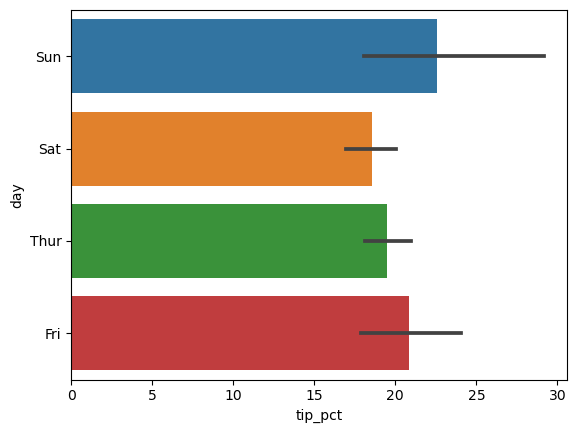

In [20]:
sns.barplot(x='tip_pct',y='day', data=df_tips,orient='h')
plt.show()

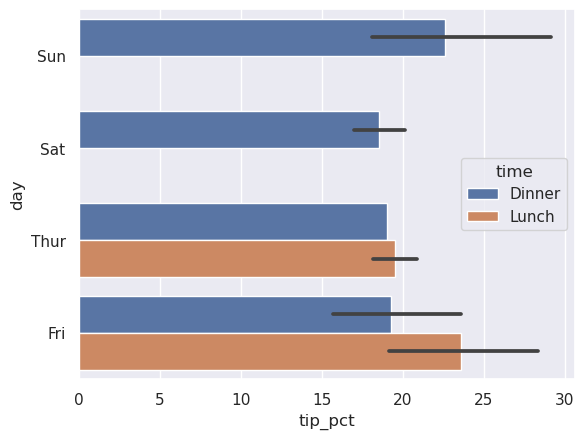

In [29]:
sns.barplot(x='tip_pct', y='day',hue='time', data=df_tips)
plt.show()

In [36]:
df_tips.describe(include='all').round(2)
#round(df_tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.00,244.00,244,244,244,244,244.00,244.00
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.79,3.00,NaN,NaN,NaN,NaN,2.57,20.21
std,8.90,1.38,NaN,NaN,NaN,NaN,0.95,16.34
min,3.07,1.00,NaN,NaN,NaN,NaN,1.00,3.70
25%,13.35,2.00,NaN,NaN,NaN,NaN,2.00,14.83
50%,17.80,2.90,NaN,NaN,NaN,NaN,2.00,18.31
75%,24.13,3.56,NaN,NaN,NaN,NaN,3.00,23.68


In [41]:
df_tips.isnull().sum()/len(df_tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [45]:
df_tips.tip.describe().round(2)

count    244.00
mean       3.00
std        1.38
min        1.00
25%        2.00
50%        2.90
75%        3.56
max       10.00
Name: tip, dtype: float64

In [46]:
df_tips.tip.median()

2.9

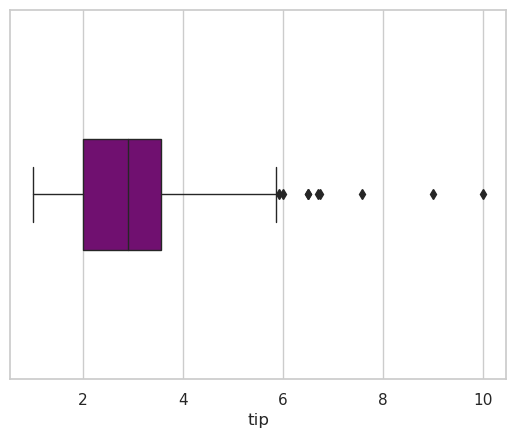

In [56]:
sns.set(style="whitegrid")
ax1=sns.boxplot(x='tip',data=df_tips,color='purple',fliersize=5, linewidth=1, width=0.3)

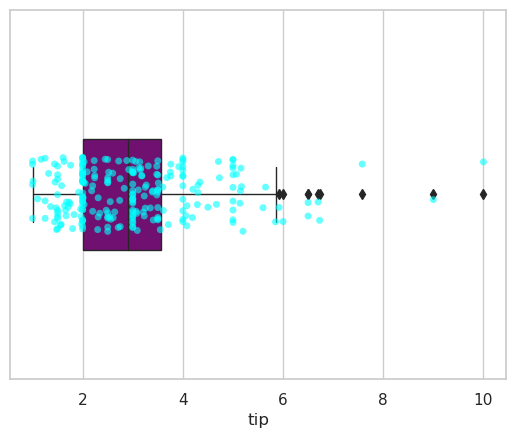

In [67]:
ax2=sns.boxplot(x='tip',data=df_tips,color='purple',fliersize=5, linewidth=1, width=0.3)
ax2=sns.stripplot(x='tip',data=df_tips, color='cyan',alpha=0.6)

#### Una Variable: 1 Numérica = 'tip_pct'

In [70]:
df_tips.tip_pct.dtypes

dtype('float64')

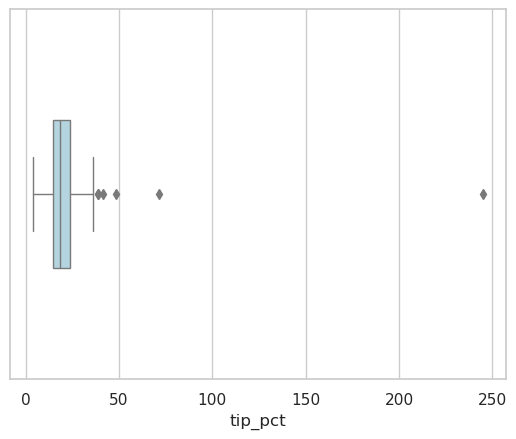

In [73]:
ax3=sns.boxplot(x='tip_pct',data=df_tips[df_tips.tip<10], color='lightblue',fliersize=5,linewidth=1,width=0.4)
plt.show()

#### Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'


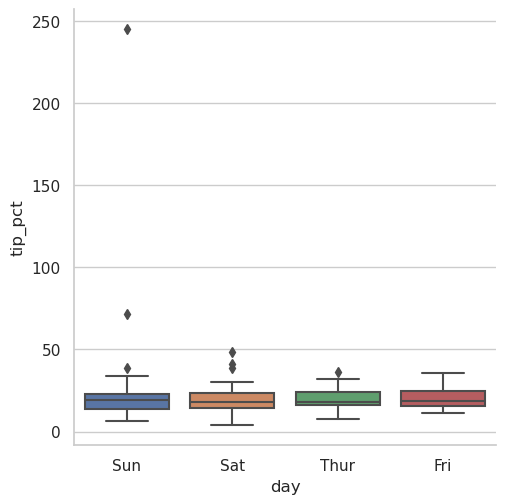

In [79]:
ax4=sns.catplot(x='day',y='tip_pct',data=df_tips[df_tips.tip<245],kind='box');


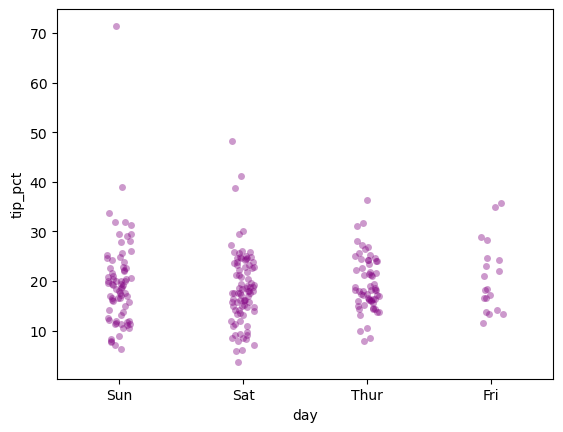

In [10]:
ax4 = sns.stripplot(x='day', y='tip_pct', data=df_tips[df_tips.tip_pct < 245], orient='v', color='purple', alpha= 0.4);

#### Tres Variables : 2 Categóricas = ('day', 'time'), 1 Numérica = 'tip_pct'

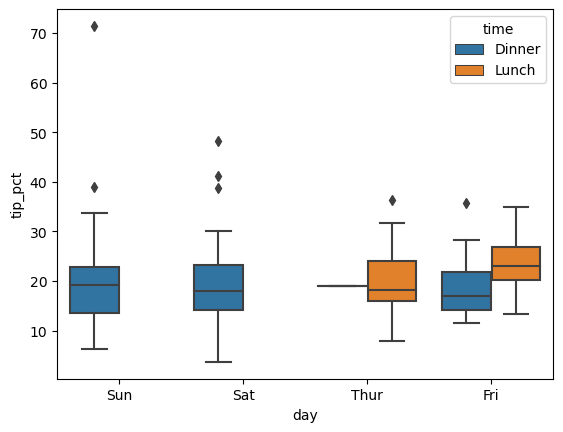

In [9]:
ax5=sns.boxplot(x='day',y='tip_pct',hue='time',data=df_tips[df_tips.tip_pct<245]);

### Cuadrículas de facetas y DataFrame categórico

Nos permite profundizar todavía más en el analysis, añadiendo una variable categórica adicional.

Usando el método factorplot( ) de "Facet Grid" :

##### Cuatro Variables : 3 Categoricas = ('day', 'time', 'smoker'), 1 Numérica = 'tip_pct'

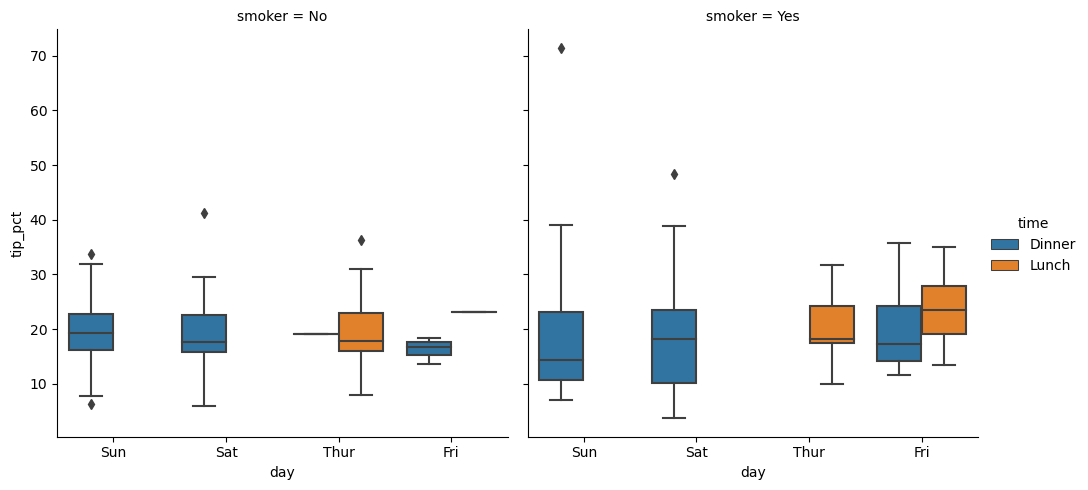

In [12]:
ax5=sns.catplot(x='day',y='tip_pct',hue='time',data=df_tips[df_tips['tip_pct']<245],col='smoker',kind='box' )